<a href="https://colab.research.google.com/github/BryanZP/Actividad_3/blob/main/Actividad_3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [108]:
#Importamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#(2020) Método aplicando desviación estándar

In [109]:
#Cargar archivo excel desde equipo
df_2020=pd.read_excel('Gastos y costos 20-23.xlsx', sheet_name= '2020',skiprows=5)
df_2020.head()

,FECHA,FOLIO,UUID,RFC,PROVEEDOR,TIPO GASTO,GASTO,DESCRIPCION,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT,TIPO,STATUS,POLIZA,Columna1
0,2020-01-01,39408,BD20F436-72CC-4BE2-AD37-5999D71AA391,ARE080115PBA,ARSI RENTA SA DE CV,MAQUINARIA,NaN,"Descripción: REVOLVEDORA, Modelo: ULTRAMP9A, M...",1.0,0.00,2248.28,0.0,0.0,2248.28,16300.00,I,Vigente,NaN,14051.72
1,2020-01-01,0001010100750847116902,85AEAC2E-6395-44A0-9CB9-754D06893375,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,NaN,COMISION COBRADA,1.0,490.00,78.40,0.0,0.0,568.40,568.40,I,Vigente,NaN,0.00
2,2020-01-01,0001010100752163714102,BD0DFE85-D776-41CB-9C5C-4FA7923E687A,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,NaN,COMISION COBRADA,1.0,195.00,31.20,0.0,0.0,226.20,226.20,I,Vigente,NaN,0.00
3,2020-01-01,3663,EF4504D6-830D-415C-AF03-80CF54C5E28E,PSS120625C86,PROMOTORA DE SERVICIOS Y SOLUCIONES EMPRESARIA...,HONORARIOS CONTABLES,NaN,HONORARIOS CONTABLES\nDEL MES DE ENERO DEL 2020.,1.0,10694.25,1711.08,0.0,0.0,12405.33,12405.33,I,Vigente,NaN,0.00
4,2020-01-01,2849,EC2F4AA4-BA64-4E2E-A5B7-4EBBE042D6D3,ENA7006081P0,ELECTROTERMICA NACIONAL SA DE CV,COMPRAS,NaN,Pago,1.0,0.00,NaN,0.0,0.0,0.00,0.00,P,Vigente,NaN,0.00


In [110]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3342 entries, 0 to 3341
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   FECHA        3342 non-null   datetime64[ns]
 1   FOLIO        3153 non-null   object        
 2   UUID         3342 non-null   object        
 3   RFC          3342 non-null   object        
 4   PROVEEDOR    3342 non-null   object        
 5   TIPO GASTO   3342 non-null   object        
 6   GASTO        840 non-null    object        
 7   DESCRIPCION  3342 non-null   object        
 8   TC           2951 non-null   float64       
 9   IMPORTE      3308 non-null   float64       
 10  IVA          3074 non-null   float64       
 11  RET ISR      3342 non-null   float64       
 12  RET IVA      3342 non-null   float64       
 13  TOTAL MX     3342 non-null   float64       
 14  TOTAL SAT    3342 non-null   float64       
 15  TIPO         3341 non-null   object        
 16  STATUS

In [111]:
#Separo por columnas
CUALITATIVAS = df_2020.iloc[:,[0,1,2,3,4,5,6,7,15,16,17]]
CUANTITATIVAS = df_2020.iloc[:,[8,9,10,11,12,13,14,18]]

In [112]:
#Reemplazamos valores nulos del dataframe con "bfill"
data=CUANTITATIVAS.fillna(method='bfill')
CUALITATIVAS=CUALITATIVAS.fillna(method='bfill')
CUALITATIVAS['POLIZA']=CUALITATIVAS['POLIZA'].fillna('PE01-ENE20')
data

,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT,Columna1
0,1.0,0.00,2248.28,0.0,0.0,2248.28,16300.00,14051.72
1,1.0,490.00,78.40,0.0,0.0,568.40,568.40,0.00
2,1.0,195.00,31.20,0.0,0.0,226.20,226.20,0.00
3,1.0,10694.25,1711.08,0.0,0.0,12405.33,12405.33,0.00
4,1.0,0.00,5131.03,0.0,0.0,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...
3337,1.0,129.79,20.21,0.0,0.0,150.00,150.00,0.00
3338,1.0,2284.80,365.57,0.0,0.0,2650.37,2650.37,0.00
3339,1.0,163.79,26.21,0.0,0.0,190.00,190.00,0.00
3340,1.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00


In [113]:
#Corroboramos valores nulos
valores_nulos=CUALITATIVAS.isnull().sum()
valores_nulos

FECHA          0
FOLIO          0
UUID           0
RFC            0
PROVEEDOR      0
TIPO GASTO     0
GASTO          0
DESCRIPCION    0
TIPO           0
STATUS         0
POLIZA         0
dtype: int64

<Figure size 1500x800 with 0 Axes>

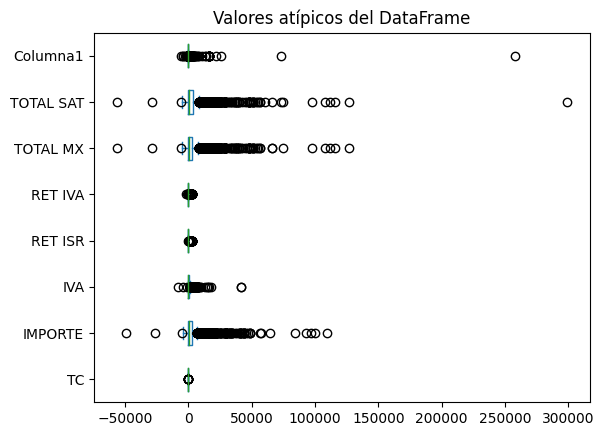

In [114]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize=(15,8))
data.plot(kind='box',vert=False)
plt.title('Valores atípicos del DataFrame')
plt.show() #Dibujamos el diagrama

In [115]:
#Método aplicando desviación estándar. Encuentro los valores extremos
y = data
Limite_Superior = y.mean() + 3*y.std()
Limite_Inferior = y.mean() - 3*y.std()
print('Límite superior permitido', Limite_Superior)
print('Límite inferior permitido', Limite_Inferior)

Límite superior permitido TC               4.239688
IMPORTE      25212.063736
IVA           5206.165867
RET ISR        667.271992
RET IVA        958.239955
TOTAL MX     28488.002843
TOTAL SAT    33250.398514
Columna1     14626.999268
dtype: float64
Límite inferior permitido TC              -2.129870
IMPORTE     -18928.758033
IVA          -4129.109781
RET ISR       -627.750813
RET IVA       -839.215179
TOTAL MX    -21455.655297
TOTAL SAT   -25762.462834
Columna1    -14171.411134
dtype: float64


In [116]:
#Encontramos outliers del Dataframe
outliers = data[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers

,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT,Columna1
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
3337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Aquí se convierten en nulos

In [117]:
#Obtenemos datos y los outliers se convierten en nulos en el DataFrame
data3 = data[(y<=Limite_Superior)&(y>=Limite_Inferior)]
data3

,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT,Columna1
0,1.0,0.00,2248.28,0.0,0.0,2248.28,16300.00,14051.72
1,1.0,490.00,78.40,0.0,0.0,568.40,568.40,0.00
2,1.0,195.00,31.20,0.0,0.0,226.20,226.20,0.00
3,1.0,10694.25,1711.08,0.0,0.0,12405.33,12405.33,0.00
4,1.0,0.00,5131.03,0.0,0.0,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...
3337,1.0,129.79,20.21,0.0,0.0,150.00,150.00,0.00
3338,1.0,2284.80,365.57,0.0,0.0,2650.37,2650.37,0.00
3339,1.0,163.79,26.21,0.0,0.0,190.00,190.00,0.00
3340,1.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00


In [118]:
#Corroboramos valores nulos
valores_nulos=data3.isnull().sum()
valores_nulos

TC            9
IMPORTE      66
IVA          46
RET ISR      21
RET IVA      74
TOTAL MX     65
TOTAL SAT    45
Columna1     15
dtype: int64

In [119]:
#Reemplazamos valores atípicos (nulos) del DataFrame con "mean"
#Realizamos una copua del dataframe
data_clean = data3.copy()
data_clean = data_clean.fillna(round(data3.mean(),1)) #El 1 es porque está redondeando
data_clean

,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT,Columna1
0,1.0,0.00,2248.28,0.0,0.0,2248.28,16300.00,14051.72
1,1.0,490.00,78.40,0.0,0.0,568.40,568.40,0.00
2,1.0,195.00,31.20,0.0,0.0,226.20,226.20,0.00
3,1.0,10694.25,1711.08,0.0,0.0,12405.33,12405.33,0.00
4,1.0,0.00,5131.03,0.0,0.0,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...
3337,1.0,129.79,20.21,0.0,0.0,150.00,150.00,0.00
3338,1.0,2284.80,365.57,0.0,0.0,2650.37,2650.37,0.00
3339,1.0,163.79,26.21,0.0,0.0,190.00,190.00,0.00
3340,1.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00


In [120]:
#Corroboramos valores nulos
valores_nulos=data_clean.isnull().sum()
valores_nulos

TC           0
IMPORTE      0
IVA          0
RET ISR      0
RET IVA      0
TOTAL MX     0
TOTAL SAT    0
Columna1     0
dtype: int64

In [121]:
#Unimos df Cualitativas con el dataframe Cuantitativas
df_2020_clean = pd.concat([CUALITATIVAS, data_clean],axis=1)
df_2020_clean

,FECHA,FOLIO,UUID,RFC,PROVEEDOR,TIPO GASTO,GASTO,DESCRIPCION,TIPO,STATUS,POLIZA,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT,Columna1
0,2020-01-01,39408,BD20F436-72CC-4BE2-AD37-5999D71AA391,ARE080115PBA,ARSI RENTA SA DE CV,MAQUINARIA,COMPRA,"Descripción: REVOLVEDORA, Modelo: ULTRAMP9A, M...",I,Vigente,PE07-ENE20,1.0,0.00,2248.28,0.0,0.0,2248.28,16300.00,14051.72
1,2020-01-01,0001010100750847116902,85AEAC2E-6395-44A0-9CB9-754D06893375,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,COMPRA,COMISION COBRADA,I,Vigente,PE07-ENE20,1.0,490.00,78.40,0.0,0.0,568.40,568.40,0.00
2,2020-01-01,0001010100752163714102,BD0DFE85-D776-41CB-9C5C-4FA7923E687A,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,COMPRA,COMISION COBRADA,I,Vigente,PE07-ENE20,1.0,195.00,31.20,0.0,0.0,226.20,226.20,0.00
3,2020-01-01,3663,EF4504D6-830D-415C-AF03-80CF54C5E28E,PSS120625C86,PROMOTORA DE SERVICIOS Y SOLUCIONES EMPRESARIA...,HONORARIOS CONTABLES,COMPRA,HONORARIOS CONTABLES\nDEL MES DE ENERO DEL 2020.,I,Vigente,PE07-ENE20,1.0,10694.25,1711.08,0.0,0.0,12405.33,12405.33,0.00
4,2020-01-01,2849,EC2F4AA4-BA64-4E2E-A5B7-4EBBE042D6D3,ENA7006081P0,ELECTROTERMICA NACIONAL SA DE CV,COMPRAS,COMPRA,Pago,P,Vigente,PE07-ENE20,1.0,0.00,5131.03,0.0,0.0,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3337,2020-12-01,125834,80BCB1D8-673F-495B-9C2A-4AC9F9CB38E5,SQS110113MU0,SERVICIO QUINTANA SUR S.A DE C.V,COMBUSTIBLE,G VTA,32011 MAGNA,I,Vigente,PE01-ENE20,1.0,129.79,20.21,0.0,0.0,150.00,150.00,0.00
3338,2020-12-01,37652,D4C7C1FB-03A7-4046-A2BD-03EBE7DA861E,PSQ790724C90,"CIA. PERIODISTICA DEL SOL DE QUERETARO, S.A. D...",PUBLICIDAD,G VTA,82101504-PUBLICIDAD EN PERIODICOSCALOR Y CONTROL,I,Vigente,PE01-ENE20,1.0,2284.80,365.57,0.0,0.0,2650.37,2650.37,0.00
3339,2020-12-01,160,FFCEE7D4-1F38-4D44-BE02-EB042DAACEE7,SQX981027RY5,"SUPER Q, S. A. DE C. V.",ALIMENTOS,G VTA,REF VICTORIA GROSELLA 3 LT PET NR,I,Vigente,PE01-ENE20,1.0,163.79,26.21,0.0,0.0,190.00,190.00,0.00
3340,2020-12-01,634875,8DFF4F01-2F8B-4085-B116-05A314108B02,BIN940223KE0,"BANCO INVEX, S.A., INSTITUCION DE BANCA MULTIP...",COMISION BANCARIA,G FINA,COMISIONES E INTERESES,I,Vigente,PE01-ENE20,1.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00


In [122]:
df_2020_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3342 entries, 0 to 3341
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   FECHA        3342 non-null   datetime64[ns]
 1   FOLIO        3342 non-null   object        
 2   UUID         3342 non-null   object        
 3   RFC          3342 non-null   object        
 4   PROVEEDOR    3342 non-null   object        
 5   TIPO GASTO   3342 non-null   object        
 6   GASTO        3342 non-null   object        
 7   DESCRIPCION  3342 non-null   object        
 8   TIPO         3342 non-null   object        
 9   STATUS       3342 non-null   object        
 10  POLIZA       3342 non-null   object        
 11  TC           3342 non-null   float64       
 12  IMPORTE      3342 non-null   float64       
 13  IVA          3342 non-null   float64       
 14  RET ISR      3342 non-null   float64       
 15  RET IVA      3342 non-null   float64       
 16  TOTAL 

In [123]:
#Convertir dataframe a csv
df_2020_clean.to_csv("Datos_limpios_2020.csv")

#2.- (2021) Procedimiento "Cuantiles"

In [124]:
#Cargar archivo excel desde equipo
df_2021=pd.read_excel('Gastos y costos 20-23.xlsx', sheet_name= '2021',skiprows=3)
df_2021.head()

,FECHA,FOLIO,UUID,RFC,PROVEEDOR,TIPO GASTO,DESCRIPCION,MP,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT,TIPO,STATUS,POLIZA
0,2021-01-01,0001010100750847116902,71B4C8B9-8DAA-47CC-AD47-9DD90AA5AF6B,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,COMISION COBRADA,PUE,1.0,490.00,78.40,0.0,0.0,568.4,568.4,I,Vigente,0
1,2021-01-01,0001010100752163714102,B8AEDE83-CC76-404C-A611-6B5A87BA561F,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,COMISION COBRADA,PUE,1.0,345.00,55.20,0.0,0.0,400.2,400.2,I,Vigente,0
2,2021-01-01,19788,19B9B2C2-DF58-E24D-B43A-3FC4D5A929E7,ESI9612311E7,"ELECTRONICOS Y SIMILARES, S.A. DE C.V.",COMPRAS,MOTO E7 PLUS AZUL 64GB 4RAM,PUE,1.0,3447.41,551.59,0.0,0.0,3999.0,3999.0,I,Vigente,0
3,2021-01-01,211781,EAB26414-DD9A-4E8F-9F5C-05FE24D98E48,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 6/36 de 03/12/2...,PPD,1.0,5551.38,888.22,0.0,0.0,6439.6,6439.6,I,Vigente,0
4,2021-01-01,211782,C16F79B5-FB35-4BFC-AF84-708B24F500BB,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006877 6/36 de 03/12/2...,PPD,1.0,5551.98,888.32,0.0,0.0,6440.3,6440.3,I,Vigente,0


In [125]:
df_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3035 entries, 0 to 3034
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   FECHA        3035 non-null   datetime64[ns]
 1   FOLIO        2888 non-null   object        
 2   UUID         3035 non-null   object        
 3   RFC          3035 non-null   object        
 4   PROVEEDOR    3035 non-null   object        
 5   TIPO GASTO   3035 non-null   object        
 6   DESCRIPCION  3035 non-null   object        
 7   MP           2381 non-null   object        
 8   TC           3035 non-null   float64       
 9   IMPORTE      3035 non-null   float64       
 10  IVA          3035 non-null   float64       
 11  RET ISR      3035 non-null   float64       
 12  RET IVA      3035 non-null   float64       
 13  TOTAL MX     3035 non-null   float64       
 14  TOTAL SAT    3035 non-null   float64       
 15  TIPO         3035 non-null   object        
 16  STATUS

In [126]:
#Separo por columnas
CUALITATIVAS = df_2021.iloc[:,[0,1,2,3,4,5,6,7,15,16,17]]
CUANTITATIVAS = df_2021.iloc[:,[8,9,10,11,12,13,14]]

In [127]:
#Reemplazamos valores nulos del dataframe con "bfill"
CUALITATIVAS=CUALITATIVAS.fillna(method='bfill')
CUALITATIVAS['POLIZA']=CUALITATIVAS['POLIZA'].fillna('PE01-ENE21')

In [128]:
valores_nulos=CUALITATIVAS.isnull().sum()
valores_nulos

FECHA          0
FOLIO          0
UUID           0
RFC            0
PROVEEDOR      0
TIPO GASTO     0
DESCRIPCION    0
MP             0
TIPO           0
STATUS         0
POLIZA         0
dtype: int64

In [129]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=CUANTITATIVAS

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print('Limite superior permitido', Limite_Superior_iqr)
print('Limite superior permitido', Limite_Inferior_iqr)

Limite superior permitido TC               1.0000
IMPORTE      10127.7125
IVA           1381.4750
RET ISR          0.0000
RET IVA          0.0000
TOTAL MX     11580.2750
TOTAL SAT    11456.0225
dtype: float64
Limite superior permitido TC              1.0000
IMPORTE     -6076.6275
IVA          -828.8850
RET ISR         0.0000
RET IVA         0.0000
TOTAL MX    -6948.1650
TOTAL SAT   -6818.3175
dtype: float64


Aquí se convierten los outliers en nulos

In [130]:
df_2021_iqr = CUANTITATIVAS[(y<=Limite_Superior)&(y>=Limite_Inferior)]
df_2021_iqr

<ipython-input-130-19dd6a4e7cf6>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_2021_iqr = CUANTITATIVAS[(y<=Limite_Superior)&(y>=Limite_Inferior)]


,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,1.0,490.00,78.40,0.0,0.0,568.40,568.40
1,1.0,345.00,55.20,0.0,0.0,400.20,400.20
2,1.0,3447.41,551.59,0.0,0.0,3999.00,3999.00
3,1.0,5551.38,888.22,0.0,0.0,6439.60,6439.60
4,1.0,5551.98,888.32,0.0,0.0,6440.30,6440.30
...,...,...,...,...,...,...,...
3030,1.0,0.00,0.00,0.0,0.0,0.00,0.00
3031,1.0,0.00,0.00,0.0,0.0,0.00,0.00
3032,1.0,22826.46,705.58,0.0,0.0,23532.04,23532.04
3033,1.0,0.00,0.00,0.0,0.0,0.00,0.00


In [131]:
valores_nulos=df_2021_iqr.isnull().sum()
valores_nulos

TC            24
IMPORTE      109
IVA           40
RET ISR       32
RET IVA       98
TOTAL MX      83
TOTAL SAT     52
dtype: int64

In [132]:
#Reemplazamos valores atípicos (nulos) del DataFrame con "mean"
#Realizamos una copia del dataframe
data4_iqr = df_2021_iqr.copy()
data4_iqr = df_2021_iqr.fillna(round(df_2021_iqr.mean(),1)) #El 1 es porque está redondeando
data4_iqr

,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,1.0,490.00,78.40,0.0,0.0,568.40,568.40
1,1.0,345.00,55.20,0.0,0.0,400.20,400.20
2,1.0,3447.41,551.59,0.0,0.0,3999.00,3999.00
3,1.0,5551.38,888.22,0.0,0.0,6439.60,6439.60
4,1.0,5551.98,888.32,0.0,0.0,6440.30,6440.30
...,...,...,...,...,...,...,...
3030,1.0,0.00,0.00,0.0,0.0,0.00,0.00
3031,1.0,0.00,0.00,0.0,0.0,0.00,0.00
3032,1.0,22826.46,705.58,0.0,0.0,23532.04,23532.04
3033,1.0,0.00,0.00,0.0,0.0,0.00,0.00


In [133]:
#Corroboramos valores nulos
valores_nulos=data4_iqr.isnull().sum()
valores_nulos

TC           0
IMPORTE      0
IVA          0
RET ISR      0
RET IVA      0
TOTAL MX     0
TOTAL SAT    0
dtype: int64

In [134]:
#Unimos df Cualitativas con el dataframe Cuantitativas
df_2021_clean = pd.concat([CUALITATIVAS, data4_iqr],axis=1)
df_2021_clean

,FECHA,FOLIO,UUID,RFC,PROVEEDOR,TIPO GASTO,DESCRIPCION,MP,TIPO,STATUS,POLIZA,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,2021-01-01,0001010100750847116902,71B4C8B9-8DAA-47CC-AD47-9DD90AA5AF6B,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,COMISION COBRADA,PUE,I,Vigente,0,1.0,490.00,78.40,0.0,0.0,568.40,568.40
1,2021-01-01,0001010100752163714102,B8AEDE83-CC76-404C-A611-6B5A87BA561F,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,COMISION COBRADA,PUE,I,Vigente,0,1.0,345.00,55.20,0.0,0.0,400.20,400.20
2,2021-01-01,19788,19B9B2C2-DF58-E24D-B43A-3FC4D5A929E7,ESI9612311E7,"ELECTRONICOS Y SIMILARES, S.A. DE C.V.",COMPRAS,MOTO E7 PLUS AZUL 64GB 4RAM,PUE,I,Vigente,0,1.0,3447.41,551.59,0.0,0.0,3999.00,3999.00
3,2021-01-01,211781,EAB26414-DD9A-4E8F-9F5C-05FE24D98E48,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 6/36 de 03/12/2...,PPD,I,Vigente,0,1.0,5551.38,888.22,0.0,0.0,6439.60,6439.60
4,2021-01-01,211782,C16F79B5-FB35-4BFC-AF84-708B24F500BB,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006877 6/36 de 03/12/2...,PPD,I,Vigente,0,1.0,5551.98,888.32,0.0,0.0,6440.30,6440.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3030,2021-12-01,127043,83F82167-0D14-144E-9D76-045C95F25DDD,PGM881128QIA,"PROMOCIONES GRAFICAS MEXICANAS, S.A. DE C.V.",PUBLICIDAD,Pago,PUE,P,Vigente,PE01-ENE21,1.0,0.00,0.00,0.0,0.0,0.00,0.00
3031,2021-12-01,11740,B1C60AE0-02BC-4A33-9513-A280F72B5D06,SME0510105C7,SPECTRIS MEXICO S DE RL DE CV,COMPRAS,INSULATED T/C WIRE,PUE,I,Vigente,PE01-ENE21,1.0,0.00,0.00,0.0,0.0,0.00,0.00
3032,2021-12-01,1092957089,255F4A25-5753-4208-8F6B-0B59E5AE4741,BMN930209927,BANCO MERCANTIL DEL NORTE SA INSTITUCION DE BA...,COMISION BANCARIA,SERVICIOS BANCARIOS,PUE,I,Vigente,PE01-ENE21,1.0,22826.46,705.58,0.0,0.0,23532.04,23532.04
3033,2021-12-01,747826,D8226E4F-9241-44C3-86A4-CDE9BC932528,BIN940223KE0,"BANCO INVEX, S.A., INSTITUCION DE BANCA MULTIP...",COMISION BANCARIA,COMISIONES E INTERESES,PUE,I,Vigente,PE01-ENE21,1.0,0.00,0.00,0.0,0.0,0.00,0.00


In [135]:
df_2021_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3035 entries, 0 to 3034
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   FECHA        3035 non-null   datetime64[ns]
 1   FOLIO        3035 non-null   object        
 2   UUID         3035 non-null   object        
 3   RFC          3035 non-null   object        
 4   PROVEEDOR    3035 non-null   object        
 5   TIPO GASTO   3035 non-null   object        
 6   DESCRIPCION  3035 non-null   object        
 7   MP           3035 non-null   object        
 8   TIPO         3035 non-null   object        
 9   STATUS       3035 non-null   object        
 10  POLIZA       3035 non-null   object        
 11  TC           3035 non-null   float64       
 12  IMPORTE      3035 non-null   float64       
 13  IVA          3035 non-null   float64       
 14  RET ISR      3035 non-null   float64       
 15  RET IVA      3035 non-null   float64       
 16  TOTAL 

In [136]:
#Convertir dataframe a csv
df_2021_clean.to_csv("Datos_limpios_2021.csv")

#(2022) Método con desviación estándar

In [137]:
#Cargar archivo excel desde equipo
df_2022=pd.read_excel('Gastos y costos 20-23.xlsx', sheet_name= '2022',skiprows=3)
df_2022.head()

,Fecha,Folio,UUID,RFC,Proveedor,TIPO GASTO,Descripción,MP,TC,Importe,IVA,RET ISR,RET IVA,Otros,TOTAL MX,TOTAL SAT,Tipo,Status,Poliza
0,2022-01-01,280108,9DA0E63F-1D47-441F-93D7-C2E05AE4D35E,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 18/36 de 03/12/...,PPD,1.0,5551.38,888.22,0.0,0.0,NaN,6439.6,6439.6,I,Vigente,PE02-ENE22
1,2022-01-01,280109,7E00E776-A839-4D57-B291-411109164B2F,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006877 18/36 de 03/12/...,PPD,1.0,5551.98,888.32,0.0,0.0,NaN,6440.3,6440.3,I,Vigente,PE03-ENE22
2,2022-01-01,007817297284,BB6585C1-3B54-4130-AFD0-1867C3764821,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,Servicios de Facturación,PUE,1.0,0.00,0.00,0.0,0.0,NaN,0.0,0.0,I,Vigente,NaN
3,2022-01-01,5595,B5E4B4EB-6C2F-11EC-BB9D-00155D014009,ZEGC530520V4A,CARLOS ENRIQUE ZERMEÑO GUTIERREZ,COMPRAS,Pago,NaN,1.0,0.00,0.00,0.0,0.0,NaN,0.0,0.0,P,Vigente,NaN
4,2022-01-01,5614,BB6756D1-6CCD-11EC-947D-00155D014407,ZEGC530520V4A,CARLOS ENRIQUE ZERMEÑO GUTIERREZ,COMPRAS,Pago,NaN,1.0,0.00,0.00,0.0,0.0,NaN,0.0,0.0,P,Vigente,NaN


In [138]:
df_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2577 entries, 0 to 2576
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Fecha        2577 non-null   datetime64[ns]
 1   Folio        2475 non-null   object        
 2   UUID         2577 non-null   object        
 3   RFC          2577 non-null   object        
 4   Proveedor    2577 non-null   object        
 5   TIPO GASTO   2577 non-null   object        
 6   Descripción  2577 non-null   object        
 7   MP           2024 non-null   object        
 8   TC           1941 non-null   float64       
 9   Importe      2577 non-null   float64       
 10  IVA          2577 non-null   float64       
 11  RET ISR      2577 non-null   float64       
 12  RET IVA      2577 non-null   float64       
 13  Otros        0 non-null      float64       
 14  TOTAL MX     2577 non-null   float64       
 15  TOTAL SAT    2577 non-null   float64       
 16  Tipo  

In [139]:
#Separo por columnas
CUALITATIVAS = df_2022.iloc[:,[0,1,2,3,4,5,6,7,13,16,17,18]]
CUANTITATIVAS = df_2022.iloc[:,[8,9,10,11,12,14,15]]

In [140]:
#Reemplazamos valores nulos del dataframe
data=CUANTITATIVAS.fillna(method='bfill')
CUANTITATIVAS['TC']=CUANTITATIVAS['TC'].fillna(round(CUANTITATIVAS['TC'].mean(),1))
CUALITATIVAS['Otros']=CUALITATIVAS['Otros'].fillna('No hay Datos')
CUALITATIVAS=CUALITATIVAS.fillna(method='ffill')
#CUALITATIVAS['Poliza']=CUALITATIVAS['Poliza'].fillna('PE01-ENE22')
#data

<ipython-input-140-6cc316730a44>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CUANTITATIVAS['TC']=CUANTITATIVAS['TC'].fillna(round(CUANTITATIVAS['TC'].mean(),1))
<ipython-input-140-6cc316730a44>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CUALITATIVAS['Otros']=CUALITATIVAS['Otros'].fillna('No hay Datos')


In [141]:
#Corroboramos valores nulos
valores_nulos=CUANTITATIVAS.isnull().sum()
valores_nulos

TC           0
Importe      0
IVA          0
RET ISR      0
RET IVA      0
TOTAL MX     0
TOTAL SAT    0
dtype: int64

<Figure size 1500x800 with 0 Axes>

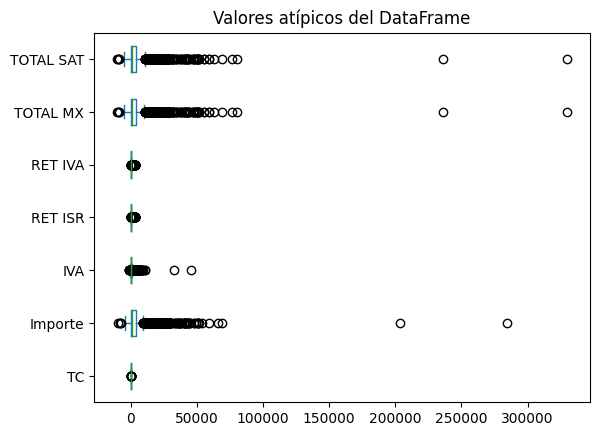

In [142]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize=(15,8))
data.plot(kind='box',vert=False)
plt.title('Valores atípicos del DataFrame')
plt.show() #Dibujamos el diagrama

In [143]:
#Método aplicando desviación estándar. Encuentro los valores extremos
y = data
Limite_Superior = y.mean() + 3*y.std()
Limite_Inferior = y.mean() - 3*y.std()
print('Límite superior permitido', Limite_Superior)
print('Límite inferior permitido', Limite_Inferior)

Límite superior permitido TC               6.220142
Importe      34975.501132
IVA           5048.646001
RET ISR        977.619941
RET IVA       1046.847384
TOTAL MX     39054.094273
TOTAL SAT    39095.543969
dtype: float64
Límite inferior permitido TC              -3.921117
Importe     -26990.441616
IVA          -4069.819702
RET ISR       -902.558225
RET IVA       -964.592475
TOTAL MX    -30247.525081
TOTAL SAT   -30172.959879
dtype: float64


In [144]:
#Encontramos outliers del Dataframe
outliers = data[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers

,TC,Importe,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2572,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2573,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2574,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2575,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [145]:
#Obtenemos datos y los outliers se convierten en nulos en el DataFrame
data3 = data[(y<=Limite_Superior)&(y>=Limite_Inferior)]
data3

,TC,Importe,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,1.0,5551.38,888.22,0.0,0.0,6439.60,6439.60
1,1.0,5551.98,888.32,0.0,0.0,6440.30,6440.30
2,1.0,0.00,0.00,0.0,0.0,0.00,0.00
3,1.0,0.00,0.00,0.0,0.0,0.00,0.00
4,1.0,0.00,0.00,0.0,0.0,0.00,0.00
...,...,...,...,...,...,...,...
2572,1.0,0.00,0.00,0.0,0.0,0.00,0.00
2573,1.0,17310.30,516.32,0.0,0.0,17826.62,17826.62
2574,NaN,0.00,0.00,0.0,0.0,0.00,0.00
2575,NaN,0.00,0.00,0.0,0.0,0.00,0.00


In [146]:
#Corroboramos valores nulos
valores_nulos=data3.isnull().sum()
valores_nulos

TC           23
Importe      36
IVA          31
RET ISR      32
RET IVA      32
TOTAL MX     36
TOTAL SAT    36
dtype: int64

In [147]:
#Reemplazamos valores atípicos (nulos) del DataFrame con "mean"
#Realizamos una copua del dataframe
data_clean = data3.copy()
data_clean = data_clean.fillna(round(data3.mean(),1)) #El 1 es porque está redondeando
data_clean

,TC,Importe,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,1.0,5551.38,888.22,0.0,0.0,6439.60,6439.60
1,1.0,5551.98,888.32,0.0,0.0,6440.30,6440.30
2,1.0,0.00,0.00,0.0,0.0,0.00,0.00
3,1.0,0.00,0.00,0.0,0.0,0.00,0.00
4,1.0,0.00,0.00,0.0,0.0,0.00,0.00
...,...,...,...,...,...,...,...
2572,1.0,0.00,0.00,0.0,0.0,0.00,0.00
2573,1.0,17310.30,516.32,0.0,0.0,17826.62,17826.62
2574,1.0,0.00,0.00,0.0,0.0,0.00,0.00
2575,1.0,0.00,0.00,0.0,0.0,0.00,0.00


In [148]:
#Corroboramos valores nulos
valores_nulos=data_clean.isnull().sum()
valores_nulos

TC           0
Importe      0
IVA          0
RET ISR      0
RET IVA      0
TOTAL MX     0
TOTAL SAT    0
dtype: int64

In [149]:
#Unimos df Cualitativas con el dataframe Cuantitativas
df_2022_clean = pd.concat([CUALITATIVAS, data_clean],axis=1)
df_2022_clean

,Fecha,Folio,UUID,RFC,Proveedor,TIPO GASTO,Descripción,MP,Otros,Tipo,Status,Poliza,TC,Importe,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,2022-01-01,280108,9DA0E63F-1D47-441F-93D7-C2E05AE4D35E,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 18/36 de 03/12/...,PPD,No hay Datos,I,Vigente,PE02-ENE22,1.0,5551.38,888.22,0.0,0.0,6439.60,6439.60
1,2022-01-01,280109,7E00E776-A839-4D57-B291-411109164B2F,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006877 18/36 de 03/12/...,PPD,No hay Datos,I,Vigente,PE03-ENE22,1.0,5551.98,888.32,0.0,0.0,6440.30,6440.30
2,2022-01-01,007817297284,BB6585C1-3B54-4130-AFD0-1867C3764821,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,Servicios de Facturación,PUE,No hay Datos,I,Vigente,PE03-ENE22,1.0,0.00,0.00,0.0,0.0,0.00,0.00
3,2022-01-01,5595,B5E4B4EB-6C2F-11EC-BB9D-00155D014009,ZEGC530520V4A,CARLOS ENRIQUE ZERMEÑO GUTIERREZ,COMPRAS,Pago,PUE,No hay Datos,P,Vigente,PE03-ENE22,1.0,0.00,0.00,0.0,0.0,0.00,0.00
4,2022-01-01,5614,BB6756D1-6CCD-11EC-947D-00155D014407,ZEGC530520V4A,CARLOS ENRIQUE ZERMEÑO GUTIERREZ,COMPRAS,Pago,PUE,No hay Datos,P,Vigente,PE03-ENE22,1.0,0.00,0.00,0.0,0.0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2572,2022-12-01,863376,E90DA089-3C3B-45C8-A19C-B8810D222F60,BIN940223KE0,"BANCO INVEX, S.A., INSTITUCION DE BANCA MULTIP...",COMISION BANCARIA,COMISIONES E INTERESES,PUE,No hay Datos,I,Vigente,PD02-DIC22/PE104-ENE23,1.0,0.00,0.00,0.0,0.0,0.00,0.00
2573,2022-12-01,1092957089,D720ED7C-F370-4236-B269-8873ABB78745,BMN930209927,BANCO MERCANTIL DEL NORTE SA INSTITUCION DE BA...,COMISION BANCARIA,SERVICIOS BANCARIOS,PUE,No hay Datos,I,Vigente,PD02-DIC22/PE104-ENE23,1.0,17310.30,516.32,0.0,0.0,17826.62,17826.62
2574,2022-12-01,4,0AFD3EB5-F3DD-43EB-B9FA-79D793CFF417,AAE6411055P8,Aesa Articulos Electricos S.A de C.V,COMPRAS,Pago,PUE,No hay Datos,P,Vigente,PD02-DIC22/PE104-ENE23,1.0,0.00,0.00,0.0,0.0,0.00,0.00
2575,2022-12-01,16,E3CA1DA8-581A-5844-80D2-CF0317B3BBEA,AAE6411055P8,AESA ARTICULOS ELECTRICOS,COMPRAS,Pago,PUE,No hay Datos,P,Vigente,PD02-DIC22/PE104-ENE23,1.0,0.00,0.00,0.0,0.0,0.00,0.00


In [150]:
df_2022_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2577 entries, 0 to 2576
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Fecha        2577 non-null   datetime64[ns]
 1   Folio        2577 non-null   object        
 2   UUID         2577 non-null   object        
 3   RFC          2577 non-null   object        
 4   Proveedor    2577 non-null   object        
 5   TIPO GASTO   2577 non-null   object        
 6   Descripción  2577 non-null   object        
 7   MP           2577 non-null   object        
 8   Otros        2577 non-null   object        
 9   Tipo         2577 non-null   object        
 10  Status       2577 non-null   object        
 11  Poliza       2577 non-null   object        
 12  TC           2577 non-null   float64       
 13  Importe      2577 non-null   float64       
 14  IVA          2577 non-null   float64       
 15  RET ISR      2577 non-null   float64       
 16  RET IV

In [151]:
#Convertir dataframe a csv
df_2022_clean.to_csv("Datos_limpios_2022.csv")

#4.- (2023) Procedimiento "Cuantiles"

In [152]:
#Cargar archivo excel desde equipo
df_2023=pd.read_excel('Gastos y costos 20-23.xlsx', sheet_name= '2023',skiprows=3)
df_2023.head()

,Fecha,Folio,UUID,RFC,Proveedor,TIPO GASTO,Descripción,MP,FP,TC,Importe,IVA,RET ISR,RET IVA,Otros,TOTAL MX,TOTAL SAT,Tipo,Status,Poliza
0,2023-01-01,31,49536321-60A4-523E-A32F-E8BDF5C2276E,AAE6411055P8,AESA ARTICULOS ELECTRICOS,COMPRAS,Pago,NaN,NaN,1.0,0.00,0.00,0.0,0.0,NaN,0.00,0.00,P,Vigente,NaN
1,2023-01-01,38,20FBB63B-D550-512F-9668-EEC6F983CEB7,AAE6411055P8,AESA ARTICULOS ELECTRICOS,COMPRAS,Pago,NaN,NaN,1.0,0.00,0.00,0.0,0.0,NaN,0.00,0.00,P,Vigente,NaN
2,2023-01-01,341932,DB8C4388-D4E0-4F0C-A09C-77C773257F44,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 30/36 de 03/12/...,PPD,99.0,1.0,5551.38,888.22,0.0,0.0,NaN,6439.60,6439.60,I,Vigente,PE01-ENE23
3,2023-01-01,341933,A81A63F5-D5EC-4601-803E-375AF9CC5021,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006877 30/36 de 03/12/...,PPD,99.0,1.0,5551.98,888.32,0.0,0.0,NaN,6440.30,6440.30,I,Vigente,PE02-ENE23
4,2023-01-01,342205,DCC10492-DE51-4C87-8430-5676FBF81931,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000009486 5/48 de 03/12/2...,PPD,99.0,1.0,8454.37,1352.70,0.0,0.0,NaN,9807.07,9807.07,I,Vigente,PE03-ENE23


In [153]:
df_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Fecha        397 non-null    datetime64[ns]
 1   Folio        384 non-null    object        
 2   UUID         397 non-null    object        
 3   RFC          397 non-null    object        
 4   Proveedor    397 non-null    object        
 5   TIPO GASTO   389 non-null    object        
 6   Descripción  397 non-null    object        
 7   MP           326 non-null    object        
 8   FP           326 non-null    float64       
 9   TC           397 non-null    float64       
 10  Importe      397 non-null    float64       
 11  IVA          397 non-null    float64       
 12  RET ISR      397 non-null    float64       
 13  RET IVA      397 non-null    float64       
 14  Otros        0 non-null      float64       
 15  TOTAL MX     397 non-null    float64       
 16  TOTAL SA

In [154]:
#Separo por columnas
CUALITATIVAS = df_2023.iloc[:,[0,1,2,3,4,5,6,7,14,17,18,19]]
CUANTITATIVAS = df_2023.iloc[:,[8,9,10,11,12,13,15,16]]

In [155]:
#Reemplazamos valores nulos del dataframe con
CUANTITATIVAS['FP']=CUANTITATIVAS['FP'].fillna(round(CUANTITATIVAS['FP'].mean(),1))
Data=CUANTITATIVAS.fillna(method='bfill')
CUALITATIVAS=CUALITATIVAS.fillna(method='bfill')
CUALITATIVAS['Poliza']=CUALITATIVAS['Poliza'].fillna('PE01-ENE23')
CUALITATIVAS['Otros']=CUALITATIVAS['Otros'].fillna('No hay Datos')
CUALITATIVAS['MP']=CUALITATIVAS['MP'].fillna('PPD')

<ipython-input-155-3e3b61375b38>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CUANTITATIVAS['FP']=CUANTITATIVAS['FP'].fillna(round(CUANTITATIVAS['FP'].mean(),1))


In [156]:
#Corroboramos valores nulos
valores_nulos=CUANTITATIVAS.isnull().sum()
valores_nulos

FP           0
TC           0
Importe      0
IVA          0
RET ISR      0
RET IVA      0
TOTAL MX     0
TOTAL SAT    0
dtype: int64

In [157]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=CUANTITATIVAS

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print('Limite superior permitido', Limite_Superior_iqr)
print('Limite superior permitido', Limite_Inferior_iqr)

Limite superior permitido FP             243.00
TC               1.00
Importe       9075.43
IVA           1120.00
RET ISR          0.00
RET IVA          0.00
TOTAL MX     10527.50
TOTAL SAT    10527.50
dtype: float64
Limite superior permitido FP           -141.00
TC              1.00
Importe     -5259.05
IVA          -672.00
RET ISR         0.00
RET IVA         0.00
TOTAL MX    -6100.50
TOTAL SAT   -6100.50
dtype: float64


In [158]:
df_2023_iqr = CUANTITATIVAS[(y<=Limite_Superior)&(y>=Limite_Inferior)]
df_2023_iqr

<ipython-input-158-d60a0be23893>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_2023_iqr = CUANTITATIVAS[(y<=Limite_Superior)&(y>=Limite_Inferior)]


,FP,TC,Importe,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,NaN,1.0,0.00,0.00,0.0,0.0,0.00,0.00
1,NaN,1.0,0.00,0.00,0.0,0.0,0.00,0.00
2,NaN,1.0,5551.38,888.22,0.0,0.0,6439.60,6439.60
3,NaN,1.0,5551.98,888.32,0.0,0.0,6440.30,6440.30
4,NaN,1.0,8454.37,1352.70,0.0,0.0,9807.07,9807.07
...,...,...,...,...,...,...,...,...
392,NaN,1.0,0.00,0.00,0.0,0.0,0.00,0.00
393,NaN,1.0,220.00,0.00,0.0,0.0,220.00,220.00
394,NaN,1.0,18071.52,682.40,0.0,0.0,18753.92,18753.92
395,NaN,1.0,14472.32,0.00,0.0,0.0,14472.32,14472.32


In [159]:
valores_nulos=df_2023_iqr.isnull().sum()
valores_nulos

FP           397
TC             2
Importe        5
IVA            6
RET ISR        4
RET IVA        6
TOTAL MX       4
TOTAL SAT      4
dtype: int64

In [160]:
#Reemplazamos valores atípicos (nulos) del DataFrame con "mean"
#Realizamos una copia del dataframe
data4_iqr = df_2023_iqr.copy()
data4_iqr = df_2023_iqr.fillna(round(df_2023_iqr.mean(),1)) #El 1 es porque está redondeando
data4_iqr

,FP,TC,Importe,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,NaN,1.0,0.00,0.00,0.0,0.0,0.00,0.00
1,NaN,1.0,0.00,0.00,0.0,0.0,0.00,0.00
2,NaN,1.0,5551.38,888.22,0.0,0.0,6439.60,6439.60
3,NaN,1.0,5551.98,888.32,0.0,0.0,6440.30,6440.30
4,NaN,1.0,8454.37,1352.70,0.0,0.0,9807.07,9807.07
...,...,...,...,...,...,...,...,...
392,NaN,1.0,0.00,0.00,0.0,0.0,0.00,0.00
393,NaN,1.0,220.00,0.00,0.0,0.0,220.00,220.00
394,NaN,1.0,18071.52,682.40,0.0,0.0,18753.92,18753.92
395,NaN,1.0,14472.32,0.00,0.0,0.0,14472.32,14472.32


In [161]:
#Corroboramos valores nulos
valores_nulos=data4_iqr.isnull().sum()
valores_nulos

FP           397
TC             0
Importe        0
IVA            0
RET ISR        0
RET IVA        0
TOTAL MX       0
TOTAL SAT      0
dtype: int64

In [162]:
#Unimos df Cualitativas con el dataframe Cuantitativas
df_2023_clean = pd.concat([CUALITATIVAS, data4_iqr],axis=1)
df_2023_clean

,Fecha,Folio,UUID,RFC,Proveedor,TIPO GASTO,Descripción,MP,Otros,Tipo,Status,Poliza,FP,TC,Importe,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,2023-01-01,31,49536321-60A4-523E-A32F-E8BDF5C2276E,AAE6411055P8,AESA ARTICULOS ELECTRICOS,COMPRAS,Pago,PPD,No hay Datos,P,Vigente,PE01-ENE23,NaN,1.0,0.00,0.00,0.0,0.0,0.00,0.00
1,2023-01-01,38,20FBB63B-D550-512F-9668-EEC6F983CEB7,AAE6411055P8,AESA ARTICULOS ELECTRICOS,COMPRAS,Pago,PPD,No hay Datos,P,Vigente,PE01-ENE23,NaN,1.0,0.00,0.00,0.0,0.0,0.00,0.00
2,2023-01-01,341932,DB8C4388-D4E0-4F0C-A09C-77C773257F44,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 30/36 de 03/12/...,PPD,No hay Datos,I,Vigente,PE01-ENE23,NaN,1.0,5551.38,888.22,0.0,0.0,6439.60,6439.60
3,2023-01-01,341933,A81A63F5-D5EC-4601-803E-375AF9CC5021,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006877 30/36 de 03/12/...,PPD,No hay Datos,I,Vigente,PE02-ENE23,NaN,1.0,5551.98,888.32,0.0,0.0,6440.30,6440.30
4,2023-01-01,342205,DCC10492-DE51-4C87-8430-5676FBF81931,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000009486 5/48 de 03/12/2...,PPD,No hay Datos,I,Vigente,PE03-ENE23,NaN,1.0,8454.37,1352.70,0.0,0.0,9807.07,9807.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,2023-02-01,882974,3E97C399-6747-4BCA-8436-ED4B0933DF33,BIN940223KE0,"BANCO INVEX, S.A., INSTITUCION DE BANCA MULTIP...",COMISION BANCARIA,COMISIONES E INTERESES,PUE,No hay Datos,I,Vigente,PE01-ENE23,NaN,1.0,0.00,0.00,0.0,0.0,0.00,0.00
393,2023-02-01,053560,B7132758-F800-4797-B1D6-CC61AFFEE444,BPU7901018D4,BEBIDAS PURIFICADAS,ALIMENTOS,Epura 20 Lts Policarbonato,PUE,No hay Datos,I,Vigente,PE01-ENE23,NaN,1.0,220.00,0.00,0.0,0.0,220.00,220.00
394,2023-02-01,1092957089,D1E2DC1E-9FFB-46C6-82E4-B350B83CB6F7,BMN930209927,BANCO MERCANTIL DEL NORTE SA INSTITUCION DE BA...,COMISION BANCARIA,SERVICIOS BANCARIOS,PUE,No hay Datos,I,Vigente,PE01-ENE23,NaN,1.0,18071.52,682.40,0.0,0.0,18753.92,18753.92
395,2023-02-01,1453820,6249FE27-6FA6-4EFB-910E-3CD67A0E29A1,EFE8908015L3,EFECTIVALE S. de R.L. de C.V.,GASOLINA,CONSUMOS DE COMBUSTIBLE DE MONEDEROS ELECTRONICOS,PUE,No hay Datos,I,Vigente,PE01-ENE23,NaN,1.0,14472.32,0.00,0.0,0.0,14472.32,14472.32


In [163]:
df_2023_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Fecha        397 non-null    datetime64[ns]
 1   Folio        397 non-null    object        
 2   UUID         397 non-null    object        
 3   RFC          397 non-null    object        
 4   Proveedor    397 non-null    object        
 5   TIPO GASTO   397 non-null    object        
 6   Descripción  397 non-null    object        
 7   MP           397 non-null    object        
 8   Otros        397 non-null    object        
 9   Tipo         397 non-null    object        
 10  Status       397 non-null    object        
 11  Poliza       397 non-null    object        
 12  FP           0 non-null      float64       
 13  TC           397 non-null    float64       
 14  Importe      397 non-null    float64       
 15  IVA          397 non-null    float64       
 16  RET ISR 

In [164]:
#Convertir dataframe a csv
df_2023_clean.to_csv("Datos_limpios_2023.csv")